# Zad 1.1

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import math
from math import log
from math import cos
from math import exp
from math import factorial
from itertools import product
from numpy.linalg import solve

args = [1, 2, 3, 4]
vals = [2, 3, 7, 8]

def f(a, b):
    return lambda x: a * x + b
    
def errorCalc(args, vals, fun):
    acc = 0
    for i in range(len(args)):
        acc += ( vals[i] - fun(args[i]) )**2
        
    return acc

# Zad 1.2

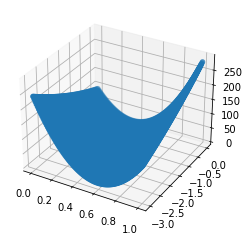

In [31]:
from mpl_toolkits.mplot3d import Axes3D

args = [4, 7, 11, 13, 17]
vals = [2, 0, 2, 6, 7]

aArr = np.linspace(0, 1, 100)
bArr = np.linspace(-3, 0, 100)

x = []
y = []
z = []

for a, b in product(aArr, bArr):
    x.append(a)
    y.append(b)
    z.append(errorCalc(args, vals, f(a, b)))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)

# Zad 1.3

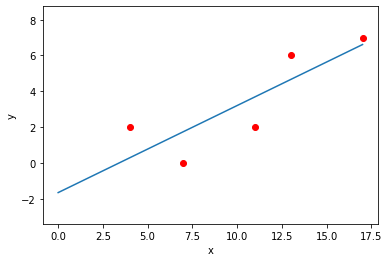

wartość błędu średniokwadratowego: 10.781007751937988
wartość najmniejsza błędu, z poprzedniego zadania: 10.781450872359967


In [32]:
args = [4, 7, 11, 13, 17]
vals = [2, 0, 2, 6, 7]
numOfPoints = len(args)

# tworzenie wyrazów p, q, r, s odpowiadających odpowiednim sumom do konstrukcji równania macierzowego 
# (na podst. D. Kincaid, W. Cheney, Numerical Mathematics and Computing)

p = sum(args)
q = sum(vals)    
r = sum([args[i] * vals[i] for i in range(numOfPoints)])
s = sum([args[i] * args[i] for i in range(numOfPoints)])

matrix = [ [s, p], [p, numOfPoints] ]
vector = [ [r], [q] ]

A = np.array(matrix)
B = np.array(vector)
result = np.linalg.solve(A, B)

a = result[0][0]
b = result[1][0]

x = np.linspace(0, 17, 5)
y = [(a * val + b) for val in x]
plt.plot(x, y)
plt.plot(args, vals, 'ro')
plt.axis('equal')

plt.xlabel('x')
plt.ylabel('y')

plt.show()

print("wartość błędu średniokwadratowego:", errorCalc(args, vals, f(a, b)))
print("wartość najmniejsza błędu, z poprzedniego zadania:", min(z))

Na podstawie wyłącznie wyników z poprzedniego zadania można było przypuszczać,
że dla danego zestawu punktów istnieje jedna funkcja aproksymująca, dla której
błąd średniokwadratowy jest najmniejszy. W obecnym zadaniu, wiadomo było, że 
istnieje jedna funkcja i należało ją wyznaczyć. Minimum z wykresu z poprzedniego
zadania jest bardzo bliskie wyznaczonej w pp. 3 wartości.

# Zad 1.4

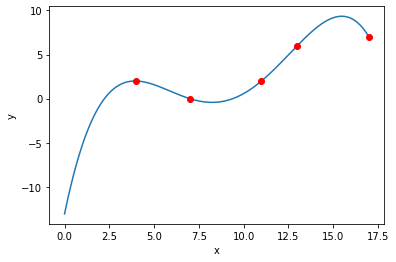

In [33]:
def xMatrixBuilder(arr):
    matrix = []
    for i in range(len(arr)):
        row = []
        for j in range(len(arr)):
            row.append(arr[i]**j)
        matrix.append(row)
         
    return matrix

def yVectorBuilder(arr):
    vector = []
    for val in arr:
        vector.append([val])
        
    return vector

def polynomial(x, coefficientArr):
    sum = 0
    for i in range(len(coefficientArr)):
        sum += coefficientArr[i] * x**i
    
    return sum

xMatrix = np.array(xMatrixBuilder(args))
Inv = np.linalg.inv(xMatrix)
yVector = np.array(yVectorBuilder(vals))
    
coefficientArr = []
for i in range(len(Inv.dot(yVector))):
    coefficientArr.append(Inv.dot(yVector)[i][0])
    
x = np.linspace(0, 17, 10000)
plt.plot(x, polynomial(x, coefficientArr))
plt.plot(args, vals, 'ro') 

plt.xlabel('x')
plt.ylabel('y')

plt.show()

Funkcja aproksymująca jest liniowa, natomiast wielomian interpolujący ma wyższy stopień.
Przewagą aproksymacji jest to, że funkcja aproksymująca nie musi być wielomianem bardzo
wysokiego stopnia (tak jak w tym przypadku - funkcja liniowa). Stopień wielomianu może
znacznie rosnąć, gdyby węzłów było więcej.

# Zad 1.5

funkcja z pp. 1.3: f(x) = 0.48643410852713176 * x + -1.6589147286821702


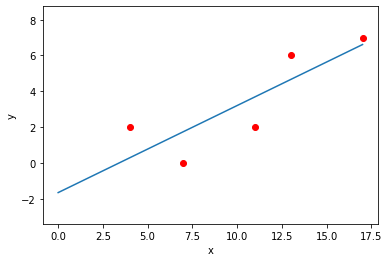

funkcja po dodaniu punktu (2, 15): f(x) = -0.19135802469135793 * x + 7.0555555555555545


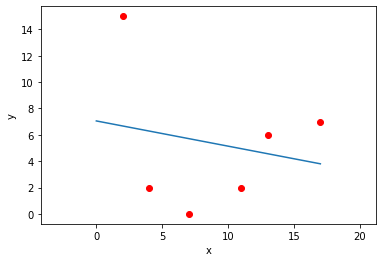

In [34]:
print("funkcja z pp. 1.3: f(x) =", a, "* x +", b)
x = np.linspace(0, 17, 5)
y = [(a * val + b) for val in x]
plt.plot(x, y)
plt.plot(args, vals, 'ro')
plt.axis('equal')

plt.xlabel('x')
plt.ylabel('y')

plt.show()

args.append(2)
vals.append(15)
numOfPoints = len(args)

p = sum(args)
q = sum(vals)    
r = sum([args[i] * vals[i] for i in range(numOfPoints)])
s = sum([args[i] * args[i] for i in range(numOfPoints)])

matrix = [ [s, p], [p, numOfPoints] ]
vector = [ [r], [q] ]

A = np.array(matrix)
B = np.array(vector)
result = np.linalg.solve(A, B)

a = result[0][0]
b = result[1][0]

print("funkcja po dodaniu punktu (2, 15): f(x) =", a, "* x +", b)
x = np.linspace(0, 17, 5)
y = [(a * val + b) for val in x]
plt.plot(x, y)
plt.plot(args, vals, 'ro')
plt.axis('equal')

plt.xlabel('x')
plt.ylabel('y')

plt.show()

Po dodaniu wartości odstającej funkcja aproksymacyjna zmieniła monotoniczność (stała się malejąca).
Wartości odstające mogą znacznie wpłynąć na aproksymację liniową. Przykładowo zakładając, że węzły
są pomiarami, a wartości odstające mogą stanowić pomiary błędne i funkcja aproksymująca ma pokazać
jakąś tendencję, to przez błędne pomiary funkcja aproksymująca, 'dostosowując się' do wszystkich 
punktów, nie pokaże zależności wśród pomiarów poprawnych.

# Zad 2

Funkcja aproksymująca ma postać: $$f(x) = a lnx + b cosx + c e^x$$
Rozważana jest funkcja $$\varphi(a, b, c) = \sum_{i=0}^{n} (a ln x_i + b cos x_i + c e^{x_i} - y_i)^2$$

Której minimum należy znaleźć. Po przyrównaniu pochodnych cząstkowych do 0

$$\frac{\partial \varphi}{\partial a} = 0, \frac{\partial \varphi}{\partial b} = 0, \frac{\partial \varphi}{\partial c} = 0$$

Otrzymujemy układ normalny (zapisany w postaci wygodnej do ułożenia równania macierzowego)

$$\begin{cases}
a\sum_{i=0}^{n} (ln(x_i))^2 + b\sum_{i=0}^{n} (ln x_i) (cos x_i) + c\sum_{i=0}^{n} (ln x_i) e^{x_i} = \sum_{i=0}^{n} y_i ln x_i \\ \\
a\sum_{i=0}^{n} (ln x_i) (cos x_i) + b\sum_{i=0}^{n} (cos x_i)^2 + c\sum_{i=0}^{n} (cos x_i) e^{x_i} = \sum_{i=0}^{n} y_i cos x_i
\\ \\
a\sum_{i=0}^{n} (ln x_i) e^{x_i} + b\sum_{i=0}^{n} (cos x_i) e^{x_i} + c\sum_{i=0}^{n} (e^{x_i})^2 = \sum_{i=0}^{n} y_i e^{x_i}
\end{cases}$$

Po podstawieniach:
$$p = \sum_{i=0}^{n} (ln(x_i))^2, q = \sum_{i=0}^{n} (ln x_i) (cos x_i), r = \sum_{i=0}^{n} (ln x_i) e^{x_i}, \\ s = \sum_{i=0}^{n} (cos x_i)^2, 
t = \sum_{i=0}^{n} (cos x_i) e^{x_i}, u = \sum_{i=0}^{n} (e^{x_i})^2, \\ v = \sum_{i=0}^{n} y_i ln x_i, w = \sum_{i=0}^{n} y_i cos x_i, z = \sum_{i=0}^{n} y_i e^{x_i}
$$

W celu znalezienia współczynników a, b, c należy rozwiązać równanie macierzowe

$$\begin{bmatrix}
p & q & r\\
q & s & t\\
r & t & u
\end{bmatrix}
\begin{bmatrix}
a\\ b\\ c
\end{bmatrix}
=
\begin{bmatrix}
v\\ w\\ z
\end{bmatrix}
$$

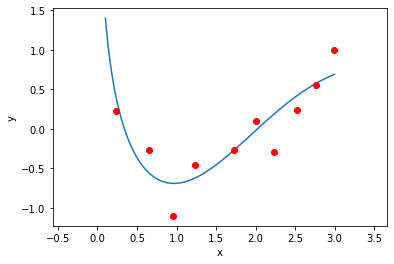

In [35]:
args = [0.24, 0.65, 0.95, 1.24, 1.73, 2.01, 2.23, 2.52, 2.77, 2.99]
vals = [0.23, -0.26, -1.10, -0.45, -0.27, 0.10, -0.29, 0.24, 0.56, 1.00]
numOfPoints = len(args)

# tworzenie wyrazów p, q, r, s, t, u, v, w, z
p = sum([( log(args[i]) ) ** 2 for i in range(numOfPoints)])
q = sum([log(args[i]) * cos(args[i]) for i in range(numOfPoints)])    
r = sum([log(args[i]) * exp(args[i]) for i in range(numOfPoints)])
s = sum([( cos(args[i]) ) ** 2 for i in range(numOfPoints)])
t = sum([cos(args[i]) * exp(args[i]) for i in range(numOfPoints)])
u = sum([( exp(args[i]) ) ** 2 for i in range(numOfPoints)])
v = sum([vals[i] * log(args[i]) for i in range(numOfPoints)])
w = sum([vals[i] * cos(args[i]) for i in range(numOfPoints)])
z = sum([vals[i] * exp(args[i]) for i in range(numOfPoints)])

matrix = [ [p, q, r], [q, s, t], [r, t, u] ]
vector = [ [v], [w], [z] ]

A = np.array(matrix)
B = np.array(vector)
result = np.linalg.solve(A, B)

a = result[0][0]
b = result[1][0]
c = result[2][0]

x = np.linspace(0.1, 3, 100)
y = [(a * log(val) + b * cos(val) + c * exp(val)) for val in x]
plt.plot(x, y)
plt.plot(args, vals, 'ro')
plt.axis('equal')

plt.xlabel('x')
plt.ylabel('y')

plt.show()

Funkcja aproksymująca musi być zdefiniowana na przedziale, w którym znajdują się aproksymowane punkty. Przykładowo, gdyby argumenty były ujemne, to powyższa funkcja nie mogłaby zostać użyta, ponieważ logarytm przyjmuje tylko wartości dodatnie

# Zad 3

p0 : 1.0
p1 : -0.6
p2 : 0.14999999999999997
p3 : -0.016666666666666635
------------
q_0 : 1.0
q_1 : 0.4
q_2 : 0.05


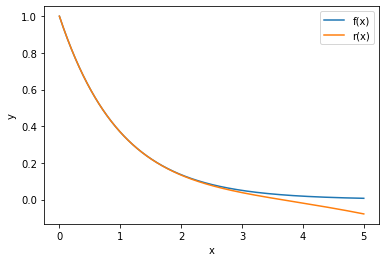

In [36]:
n = 3 # licznik
m = 2 # mianownik

N = n + m

def expTaylor(i):
    return (-1) ** i / factorial(i)

# wiersze macierzy są tworzone jako współczynniki odpowiednio przy
# p_0, p_1, ..., p_n, q_0, q_1, ..., q_m
matrix = []

for i in range(N + 1):
    row = []
    for j in range(n + 1): # wpisanie p_i
        if j == i:
            row.append(-1)
        else:
            row.append(0)
    for k in range(m + 1): # wpisanie q_i
        idx = i - k
        if idx >= 0:
            row.append(expTaylor(idx))
        else:
            row.append(0)

    matrix.append(row)

# dopisanie ostatniego wiersza, wiedzac ze q0 = 1
row = [0] * (N + 2)
row[n + 1] = 1
matrix.append(row)

# utworzenie wektora wyrazów wolnych [0, 0, ..., 1]
vector = [0] * (N + 2)
vector[N + 1] = 1

A = np.array(matrix)
B = np.array(vector)
X = solve(A, B)

for i in range(n + 1):
    print("p" + str(i),":", X[i])

print("------------")

for i in range(m + 1):
    print("q_" + str(i),":", X[n + 1 + i])

def r(x):
    numerator = 0 
    for i in range(n + 1):
        numerator += X[i] * x ** i

    denominator = 0
    for i in range(m + 1):
        denominator += X[n + 1 + i] * x ** i

    return numerator / denominator

args = np.linspace(0, 5, 1000)
fVal = [exp(-x) for x in args]
rVal = [r(x) for x in args]

plt.plot(args, fVal, label='f(x)')
plt.plot(args, rVal, label='r(x)')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()